In [ ]:
# !export SPARK_HOME="$HOME/spark-2.4.5-bin-hadoop2.7"

In [1]:
import pyspark
from pyspark import SparkConf
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession \
    .builder \
    .appName("Our first Spark SQL example") \
    .getOrCreate()

In [3]:
spark.sparkContext.getConf().getAll()

[('spark.app.name', 'Our first Spark SQL example'),
 ('spark.app.id', 'local-1587818651426'),
 ('spark.rdd.compress', 'True'),
 ('spark.driver.host', '10.234.15.26'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.driver.port', '44037'),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true')]

In [4]:
spark

In [5]:
path = "data/sparkify_log_small.json"

In [6]:
user_log = spark.read.json(path)

In [7]:
user_log.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [8]:
user_log.describe()

DataFrame[summary: string, artist: string, auth: string, firstName: string, gender: string, itemInSession: string, lastName: string, length: string, level: string, location: string, method: string, page: string, registration: string, sessionId: string, song: string, status: string, ts: string, userAgent: string, userId: string]

In [9]:
user_log.describe().show()

+-------+-----------------+----------+---------+------+------------------+--------+-----------------+-----+------------+------+-------+--------------------+------------------+--------+-----------------+-------------------+--------------------+------------------+
|summary|           artist|      auth|firstName|gender|     itemInSession|lastName|           length|level|    location|method|   page|        registration|         sessionId|    song|           status|                 ts|           userAgent|            userId|
+-------+-----------------+----------+---------+------+------------------+--------+-----------------+-----+------------+------+-------+--------------------+------------------+--------+-----------------+-------------------+--------------------+------------------+
|  count|             8347|     10000|     9664|  9664|             10000|    9664|             8347|10000|        9664| 10000|  10000|                9664|             10000|    8347|            10000|         

In [10]:
user_log.describe("length").show()

+-------+-----------------+
|summary|           length|
+-------+-----------------+
|  count|             8347|
|   mean|249.6486587492506|
| stddev|95.00437130781461|
|    min|          1.12281|
|    max|        1806.8371|
+-------+-----------------+



In [11]:
user_log.show(n=1)

+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|Showaddywaddy|Logged In|  Kenneth|     M|          112|Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+------

In [12]:
user_log.take(5)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000'),
 Row(artist='Cobra Starship Featuring Leighton Meester', auth='Logged In', firstNa

In [13]:
user_log.first()

Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046')

In [14]:
user_log.select("artist").show()

+--------------------+
|              artist|
+--------------------+
|       Showaddywaddy|
|          Lily Allen|
|Cobra Starship Fe...|
|          Alex Smoke|
|                null|
|                null|
|              Redman|
|     Ulrich Schnauss|
|                null|
|                null|
|               Jay-Z|
|         Evanescence|
|     Scissor Sisters|
|        3 Doors Down|
|       George Younce|
|              Aly-Us|
|                null|
|            BjÃÂ¶rk|
|      David Bromberg|
|          Nickelback|
+--------------------+
only showing top 20 rows



In [15]:
user_log.select(user_log["artist"], user_log["auth"]).show()

+--------------------+---------+
|              artist|     auth|
+--------------------+---------+
|       Showaddywaddy|Logged In|
|          Lily Allen|Logged In|
|Cobra Starship Fe...|Logged In|
|          Alex Smoke|Logged In|
|                null|Logged In|
|                null|Logged In|
|              Redman|Logged In|
|     Ulrich Schnauss|Logged In|
|                null|Logged In|
|                null|Logged In|
|               Jay-Z|Logged In|
|         Evanescence|Logged In|
|     Scissor Sisters|Logged In|
|        3 Doors Down|Logged In|
|       George Younce|Logged In|
|              Aly-Us|Logged In|
|                null|Logged In|
|            BjÃÂ¶rk|Logged In|
|      David Bromberg|Logged In|
|          Nickelback|Logged In|
+--------------------+---------+
only showing top 20 rows



In [16]:
user_log.count()

10000

In [17]:
user_log.filter(user_log["length"] > 1000).count()

9

In [18]:
out_path = "data/sparkify_log_small_csv"

In [19]:
# # already exists
# user_log.write.save(out_path, format = "csv", header = True)

In [20]:
user_log_2 = spark.read.csv(out_path, header = True)

In [21]:
user_log_2.count()

10000

In [22]:
user_log_2.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: string (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: string (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: string (nullable = true)
 |-- sessionId: string (nullable = true)
 |-- song: string (nullable = true)
 |-- status: string (nullable = true)
 |-- ts: string (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [23]:
from pyspark.sql.functions import udf
from pyspark.sql.functions import desc
from pyspark.sql.functions import asc
from pyspark.sql.functions import sum as Fsum
from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType

import datetime

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [24]:
user_log.take(5)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000'),
 Row(artist='Cobra Starship Featuring Leighton Meester', auth='Logged In', firstNa

In [25]:
user_log.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [26]:
user_log.describe().show()

+-------+-----------------+----------+---------+------+------------------+--------+-----------------+-----+------------+------+-------+--------------------+------------------+--------+-----------------+-------------------+--------------------+------------------+
|summary|           artist|      auth|firstName|gender|     itemInSession|lastName|           length|level|    location|method|   page|        registration|         sessionId|    song|           status|                 ts|           userAgent|            userId|
+-------+-----------------+----------+---------+------+------------------+--------+-----------------+-----+------------+------+-------+--------------------+------------------+--------+-----------------+-------------------+--------------------+------------------+
|  count|             8347|     10000|     9664|  9664|             10000|    9664|             8347|10000|        9664| 10000|  10000|                9664|             10000|    8347|            10000|         

In [27]:
user_log.describe("artist").show()

+-------+-----------------+
|summary|           artist|
+-------+-----------------+
|  count|             8347|
|   mean|            461.0|
| stddev|            300.0|
|    min|              !!!|
|    max|ÃÂlafur Arnalds|
+-------+-----------------+



In [28]:
user_log.describe("length").show()

+-------+-----------------+
|summary|           length|
+-------+-----------------+
|  count|             8347|
|   mean|249.6486587492506|
| stddev|95.00437130781461|
|    min|          1.12281|
|    max|        1806.8371|
+-------+-----------------+



In [29]:
user_log.filter("length is null").count()

1653

In [30]:
user_log.filter("length is not null").describe("length").show()

+-------+-----------------+
|summary|           length|
+-------+-----------------+
|  count|             8347|
|   mean|249.6486587492506|
| stddev|95.00437130781461|
|    min|          1.12281|
|    max|        1806.8371|
+-------+-----------------+



In [31]:
user_log.filter("length is null").describe().show()

+-------+------+----------+---------+------+------------------+--------+------+-----+----------------+------+-------+--------------------+------------------+----+------------------+--------------------+--------------------+------------------+
|summary|artist|      auth|firstName|gender|     itemInSession|lastName|length|level|        location|method|   page|        registration|         sessionId|song|            status|                  ts|           userAgent|            userId|
+-------+------+----------+---------+------+------------------+--------+------+-----+----------------+------+-------+--------------------+------------------+----+------------------+--------------------+--------------------+------------------+
|  count|     0|      1653|     1317|  1317|              1653|    1317|     0| 1653|            1317|  1653|   1653|                1317|              1653|   0|              1653|                1653|                1317|              1653|
|   mean|  null|      null| 

In [32]:
user_log.count()

10000

In [33]:
user_log.select("page").dropDuplicates().sort("page").show()

+----------------+
|            page|
+----------------+
|           About|
|       Downgrade|
|           Error|
|            Help|
|            Home|
|           Login|
|          Logout|
|        NextSong|
|   Save Settings|
|        Settings|
|Submit Downgrade|
|  Submit Upgrade|
|         Upgrade|
+----------------+



In [34]:
user_log.filter(user_log["page"] == "Submit Downgrade").show()

+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+
|artist|     auth|firstName|gender|itemInSession|lastName|length|level|            location|method|            page| registration|sessionId|song|status|           ts|           userAgent|userId|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+
|  null|Logged In|    Kelly|     F|           24|  Newton|  null| paid|Houston-The Woodl...|   PUT|Submit Downgrade|1513283366284|     5931|null|   307|1513768454284|Mozilla/5.0 (Wind...|  1138|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+



In [35]:
user_log.select(["userId", "firstname", "page", "song"]).where(user_log.userId == "1046").collect()

[Row(userId='1046', firstname='Kenneth', page='NextSong', song='Christmas Tears Will Fall'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Be Wary Of A Woman'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Public Enemy No.1'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Reign Of The Tyrants'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Father And Son'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='No. 5'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Seventeen'),
 Row(userId='1046', firstname='Kenneth', page='Home', song=None),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='War on war'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Killermont Street'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Black & Blue'),
 Row(userId='1046', firstname='Kenneth', page='Logout', song=None),
 Row(userId='1046', firstname='Kenneth'

In [36]:
user_log.select(["userId", "firstname", "page", "song", "ts"]).where(user_log.userId == "1046").show(n = 30)

+------+---------+--------+--------------------+-------------+
|userId|firstname|    page|                song|           ts|
+------+---------+--------+--------------------+-------------+
|  1046|  Kenneth|NextSong|Christmas Tears W...|1513720872284|
|  1046|  Kenneth|NextSong|  Be Wary Of A Woman|1513721104284|
|  1046|  Kenneth|NextSong|   Public Enemy No.1|1513721310284|
|  1046|  Kenneth|NextSong|Reign Of The Tyrants|1513721591284|
|  1046|  Kenneth|NextSong|      Father And Son|1513721808284|
|  1046|  Kenneth|NextSong|               No. 5|1513721976284|
|  1046|  Kenneth|NextSong|           Seventeen|1513722161284|
|  1046|  Kenneth|    Home|                null|1513837636284|
|  1046|  Kenneth|NextSong|          War on war|1513837660284|
|  1046|  Kenneth|NextSong|   Killermont Street|1513837887284|
|  1046|  Kenneth|NextSong|        Black & Blue|1513838080284|
|  1046|  Kenneth|  Logout|                null|1513838081284|
|  1046|  Kenneth|    Home|                null|1513838

In [90]:
get_hour = udf(lambda x: datetime.datetime.fromtimestamp(x / 1000.0).hour, IntegerType())  # udf = user-defined function

In [91]:
user_log_mut = user_log.withColumn('hour', get_hour(user_log.ts))

In [92]:
user_log_mut \
    .select(["userId", "firstname", "page", "song", "hour"]) \
    .where(user_log_mut.userId == "1046") \
    .show(n = 30)

+------+---------+--------+--------------------+----+
|userId|firstname|    page|                song|hour|
+------+---------+--------+--------------------+----+
|  1046|  Kenneth|NextSong|Christmas Tears W...|  17|
|  1046|  Kenneth|NextSong|  Be Wary Of A Woman|  17|
|  1046|  Kenneth|NextSong|   Public Enemy No.1|  17|
|  1046|  Kenneth|NextSong|Reign Of The Tyrants|  17|
|  1046|  Kenneth|NextSong|      Father And Son|  17|
|  1046|  Kenneth|NextSong|               No. 5|  17|
|  1046|  Kenneth|NextSong|           Seventeen|  17|
|  1046|  Kenneth|    Home|                null|   1|
|  1046|  Kenneth|NextSong|          War on war|   1|
|  1046|  Kenneth|NextSong|   Killermont Street|   1|
|  1046|  Kenneth|NextSong|        Black & Blue|   1|
|  1046|  Kenneth|  Logout|                null|   1|
|  1046|  Kenneth|    Home|                null|   1|
|  1046|  Kenneth|NextSong|     Heads Will Roll|   1|
|  1046|  Kenneth|NextSong|Bleed It Out [Liv...|   1|
|  1046|  Kenneth|NextSong| 

In [95]:
songs_in_hour = user_log_mut \
    .filter(user_log_mut.page == "NextSong") \
    .groupby(user_log_mut.hour) \
    .count() \
    .orderBy('hour')
    # .sort('hour')
    # .orderBy(user_log_mut.hour.cast("float"))

In [96]:
songs_in_hour.show(n = 24)

+----+-----+
|hour|count|
+----+-----+
|   0|  276|
|   1|  348|
|   2|  358|
|   3|  375|
|   4|  249|
|   5|  216|
|   6|  228|
|   7|  251|
|   8|  339|
|   9|  462|
|  10|  479|
|  11|  484|
|  12|  430|
|  13|  362|
|  14|  295|
|  15|  257|
|  16|  248|
|  17|  369|
|  18|  375|
|  19|  456|
|  20|  454|
|  21|  382|
|  22|  302|
|  23|  352|
+----+-----+



In [97]:
songs_in_hour_pd = songs_in_hour.toPandas()

In [98]:
songs_in_hour_pd

,hour,count
0,0,276
1,1,348
2,2,358
3,3,375
4,4,249
5,5,216
6,6,228
7,7,251
8,8,339
9,9,462


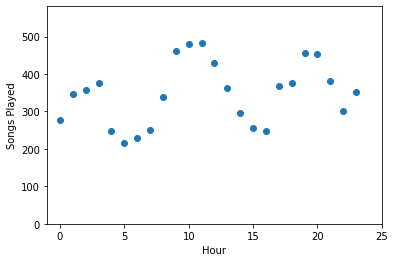

In [99]:
plt.scatter(songs_in_hour_pd['hour'], songs_in_hour_pd['count'])
# songs_in_hour_pd.plot(kind='line', x='hour', y='count')
plt.xlim(-1, 25)
plt.ylim(0, 1.2 * max(songs_in_hour_pd['count']))
plt.xlabel("Hour")
plt.ylabel("Songs Played")
plt.show()

In [100]:
user_log_valid = user_log_mut.dropna(how = "any", subset = ["userId", "sessionId"])

In [101]:
user_log_valid.count()

10000

In [102]:
user_log_mut.select("userId").dropDuplicates().sort("userId").show()

+------+
|userId|
+------+
|      |
|    10|
|   100|
|  1000|
|  1003|
|  1005|
|  1006|
|  1017|
|  1019|
|  1020|
|  1022|
|  1025|
|  1030|
|  1035|
|  1037|
|   104|
|  1040|
|  1042|
|  1043|
|  1046|
+------+
only showing top 20 rows



In [103]:
user_log_valid_2 = user_log_mut.filter(user_log_valid["userId"] != "")

In [104]:
user_log_valid_2.count()

9664

In [105]:
user_log_valid_2.filter("page = 'Submit Downgrade'").show()

+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|artist|     auth|firstName|gender|itemInSession|lastName|length|level|            location|method|            page| registration|sessionId|song|status|           ts|           userAgent|userId|hour|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|  null|Logged In|    Kelly|     F|           24|  Newton|  null| paid|Houston-The Woodl...|   PUT|Submit Downgrade|1513283366284|     5931|null|   307|1513768454284|Mozilla/5.0 (Wind...|  1138|   6|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+


In [106]:
user_log_mut \
    .select(["userId", "firstname", "page", "level", "song"]) \
    .where(user_log_mut.userId == "1138") \
    .show(n=100)  # .collect()

+------+---------+----------------+-----+--------------------+
|userId|firstname|            page|level|                song|
+------+---------+----------------+-----+--------------------+
|  1138|    Kelly|            Home| paid|                null|
|  1138|    Kelly|        NextSong| paid| Everybody Everybody|
|  1138|    Kelly|        NextSong| paid|               Gears|
|  1138|    Kelly|        NextSong| paid|        Use Somebody|
|  1138|    Kelly|        NextSong| paid|Love Of My Life (...|
|  1138|    Kelly|        NextSong| paid|Down In The Valle...|
|  1138|    Kelly|        NextSong| paid|Treat Her Like A ...|
|  1138|    Kelly|        NextSong| paid|Everybody Thinks ...|
|  1138|    Kelly|        NextSong| paid|      Fourteen Wives|
|  1138|    Kelly|        NextSong| paid|   Love On The Rocks|
|  1138|    Kelly|        NextSong| paid|           Breakeven|
|  1138|    Kelly|        NextSong| paid|          Leaf House|
|  1138|    Kelly|        NextSong| paid|       NAISEN 

In [107]:
flag_downgrade_event = udf(lambda x: 1 if x == 'Submit Downgrade' else 0, IntegerType())

In [108]:
user_log_valid_2_mut = user_log_valid_2.withColumn('downgraded', flag_downgrade_event("page"))

In [109]:
user_log_valid_2_mut.head()

Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour=17, downgraded=0)

In [110]:
from pyspark.sql import Window

In [111]:
windoweval = Window.partitionBy("userId").orderBy(desc("ts")).rangeBetween(Window.unboundedPreceding, 0)

In [112]:
user_log_valid_2_mut_2 = user_log_valid_2_mut.withColumn("phase", Fsum("downgraded").over(windoweval))

In [113]:
user_log_valid_2_mut_2 \
    .select(["userId", "firstname", "ts", "page", "level", "phase"]) \
    .where(user_log_valid_2_mut_2.userId == "1138") \
    .sort("ts") \
    .collect()

[Row(userId='1138', firstname='Kelly', ts=1513729066284, page='Home', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729066284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729313284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729552284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513729783284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730001284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730263284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730518284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513730768284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstname='Kelly', ts=1513731182284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firs

In [114]:
# .sort(user_log_valid_2_mut.hour.cast("int")) \
user_log_valid_2_mut \
    .groupBy('hour') \
    .avg('length') \
    .sort('hour') \
    .show(24)

+----+------------------+
|hour|       avg(length)|
+----+------------------+
|   0| 257.6102417028985|
|   1|  249.849661551724|
|   2| 256.3394302793296|
|   3| 252.2195236800001|
|   4|254.56417550200797|
|   5|255.63008305555562|
|   6|248.70244679824566|
|   7|246.08352741035876|
|   8|248.70491044247797|
|   9| 255.2532473376623|
|  10|250.10743448851755|
|  11|250.68271084710747|
|  12|253.62343641860488|
|  13|244.52912132596697|
|  14| 247.8121510508474|
|  15|245.07934669260686|
|  16|244.07686028225814|
|  17|  252.557046612466|
|  18|246.87570682666652|
|  19|252.24908469298236|
|  20|245.94171312775322|
|  21|242.34550662303656|
|  22|252.98646897350986|
|  23| 236.7677098579545|
+----+------------------+



In [115]:
# .groupBy(user_log_valid_2_mut['level'], user_log_valid_2_mut['gender']) \
user_log_valid_2_mut \
    .groupBy(user_log_valid_2_mut.level, user_log_valid_2_mut.gender) \
    .avg('length') \
    .sort('avg(length)') \
    .show()

+-----+------+------------------+
|level|gender|       avg(length)|
+-----+------+------------------+
| free|     M|248.52634725560546|
| paid|     F|249.04044376862367|
| paid|     M|249.82139310562144|
| free|     F| 251.6365394303153|
+-----+------+------------------+



In [116]:
user_log_valid_2_mut \
    .groupBy('level') \
    .agg({'length': 'avg', 'hour' : 'max'}) \
    .show()

+-----+---------+------------------+
|level|max(hour)|       avg(length)|
+-----+---------+------------------+
| free|       23| 249.9836012631079|
| paid|       23|249.53620725396027|
+-----+---------+------------------+



In [127]:
user_log_valid_2_mut.select(user_log_valid_2_mut.userId, user_log_valid_2_mut.page).show(10)

+------+--------+
|userId|    page|
+------+--------+
|  1046|NextSong|
|  1000|NextSong|
|  2219|NextSong|
|  2373|NextSong|
|  1747|    Home|
|  1747|Settings|
|  1162|NextSong|
|  1061|NextSong|
|   748|    Home|
|   597|    Home|
+------+--------+
only showing top 10 rows



In [128]:
user_log_valid_2_mut \
    .groupBy('userId') \
    .count() \
    .sort(desc('count')) \
    .show()

+------+-----+
|userId|count|
+------+-----+
|    58|  313|
|  1647|  199|
|  1232|  180|
|   748|  162|
|  2481|  148|
|  1865|  137|
|   462|  122|
|  1950|  122|
|  1806|  121|
|  2160|  118|
|   644|  115|
|  1035|  103|
|  1290|  100|
|   523|   99|
|   649|   97|
|  2290|   92|
|  2462|   92|
|  1776|   90|
|  2892|   89|
|  2359|   87|
+------+-----+
only showing top 20 rows



In [159]:
user_log_valid_2_mut \
    .groupBy(user_log_valid_2_mut.userId, user_log_valid_2_mut.page) \
    .count() \
    .filter(user_log_valid_2_mut.page == "NextSong") \
    .sort(user_log_valid_2_mut.userId) \
    .show()

+------+--------+-----+
|userId|    page|count|
+------+--------+-----+
|    10|NextSong|    2|
|   100|NextSong|    5|
|  1000|NextSong|    1|
|  1003|NextSong|    1|
|  1005|NextSong|    1|
|  1006|NextSong|    3|
|  1017|NextSong|   10|
|  1019|NextSong|   22|
|  1020|NextSong|    4|
|  1022|NextSong|    2|
|  1025|NextSong|    4|
|  1030|NextSong|    1|
|  1035|NextSong|   94|
|  1037|NextSong|   12|
|   104|NextSong|    6|
|  1040|NextSong|    1|
|  1042|NextSong|    3|
|  1043|NextSong|    1|
|  1046|NextSong|   27|
|   105|NextSong|   23|
+------+--------+-----+
only showing top 20 rows



In [129]:
flag_nextsong_event = udf(lambda x: 1 if x == 'NextSong' else 0, IntegerType())

In [130]:
user_log_valid_3_mut = user_log_valid_2_mut.withColumn('clickNext', flag_nextsong_event('page'))

In [138]:
user_log_valid_3_mut \
    .select(user_log_valid_3_mut.userId, 
            user_log_valid_3_mut.ts, 
            user_log_valid_3_mut.page, 
            user_log_valid_3_mut.clickNext) \
    .sort(user_log_valid_3_mut.userId, user_log_valid_3_mut.ts) \
    .show()

+------+-------------+--------+---------+
|userId|           ts|    page|clickNext|
+------+-------------+--------+---------+
|    10|1513790894284|NextSong|        1|
|    10|1513828388284|NextSong|        1|
|   100|1513750214284|NextSong|        1|
|   100|1513750442284|NextSong|        1|
|   100|1513775431284|    Home|        0|
|   100|1513775556284|NextSong|        1|
|   100|1513775710284|NextSong|        1|
|   100|1513776194284|    Home|        0|
|   100|1513776308284|NextSong|        1|
|   100|1513839673284|    Home|        0|
|  1000|1513720878284|NextSong|        1|
|  1003|1513749501284|    Home|        0|
|  1003|1513749516284|NextSong|        1|
|  1003|1513749525284|    Home|        0|
|  1005|1513782278284|NextSong|        1|
|  1006|1513773548284|NextSong|        1|
|  1006|1513773777284|NextSong|        1|
|  1006|1513774019284|NextSong|        1|
|  1017|1513817806284|NextSong|        1|
|  1017|1513818023284|NextSong|        1|
+------+-------------+--------+---

In [140]:
window_eval_2 = Window \
    .partitionBy("userId") \
    .orderBy(asc("ts")) \
    .rangeBetween(Window.unboundedPreceding, 0)

In [150]:
# user_log_valid_2_mut_2 = user_log_valid_2_mut.withColumn("phase", Fsum("downgraded").over(windoweval))
user_log_valid_3_mut_3 = user_log_valid_3_mut \
    .withColumn('nextSongRunSum', Fsum('clickNext').over(window_eval_2))

In [151]:
user_log_valid_3_mut_3 \
    .select(user_log_valid_3_mut_3.userId, 
            user_log_valid_3_mut_3.ts, 
            user_log_valid_3_mut_3.page, 
            user_log_valid_3_mut_3.clickNext,
            user_log_valid_3_mut_3.nextSongRunSum) \
    .sort(user_log_valid_3_mut_3.userId,
          user_log_valid_3_mut_3.ts) \
    .show()

+------+-------------+--------+---------+--------------+
|userId|           ts|    page|clickNext|nextSongRunSum|
+------+-------------+--------+---------+--------------+
|    10|1513790894284|NextSong|        1|             1|
|    10|1513828388284|NextSong|        1|             2|
|   100|1513750214284|NextSong|        1|             1|
|   100|1513750442284|NextSong|        1|             2|
|   100|1513775431284|    Home|        0|             2|
|   100|1513775556284|NextSong|        1|             3|
|   100|1513775710284|NextSong|        1|             4|
|   100|1513776194284|    Home|        0|             4|
|   100|1513776308284|NextSong|        1|             5|
|   100|1513839673284|    Home|        0|             5|
|  1000|1513720878284|NextSong|        1|             1|
|  1003|1513749501284|    Home|        0|             0|
|  1003|1513749516284|NextSong|        1|             1|
|  1003|1513749525284|    Home|        0|             1|
|  1005|1513782278284|NextSong|

In [158]:
#     .select(user_log_valid_3_mut_3.userId, 
#             user_log_valid_3_mut_3.ts, 
#             user_log_valid_3_mut_3.page, 
#             user_log_valid_3_mut_3.clickNext,
#             user_log_valid_3_mut_3.nextSongRunSum) \
#     .sort(user_log_valid_3_mut_3.userId,
#           user_log_valid_3_mut_3.ts) \
# user_log_valid_3_mut_3 \
#     .groupBy(user_log_valid_3_mut_3.userId) \
#     .max(user_log_valid_3_mut_3.length) \
#     .show()
user_log_valid_3_mut_3 \
    .groupBy(user_log_valid_3_mut_3.userId) \
    .max('nextSongRunSum') \
    .sort(user_log_valid_3_mut_3.userId) \
    .show()

+------+-------------------+
|userId|max(nextSongRunSum)|
+------+-------------------+
|    10|                  2|
|   100|                  5|
|  1000|                  1|
|  1003|                  1|
|  1005|                  1|
|  1006|                  3|
|  1017|                 10|
|  1019|                 22|
|  1020|                  4|
|  1022|                  2|
|  1025|                  4|
|  1030|                  1|
|  1035|                 94|
|  1037|                 12|
|   104|                  6|
|  1040|                  1|
|  1042|                  3|
|  1043|                  1|
|  1046|                 27|
|  1048|                  0|
+------+-------------------+
only showing top 20 rows



In [167]:
user_log \
    .filter(user_log.userId == "") \
    .select('page') \
    .dropDuplicates() \
    .show()

+-----+
| page|
+-----+
| Home|
|About|
|Login|
| Help|
+-----+



In [172]:
user_log \
    .select(['userId', 'gender']) \
    .dropDuplicates() \
    .groupBy('gender') \
    .count() \
    .show()

+------+-----+
|gender|count|
+------+-----+
|     F|  462|
|  null|    1|
|     M|  501|
+------+-----+



In [173]:
user_log.show()

+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|              artist|     auth|firstName|gender|itemInSession| lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       Showaddywaddy|Logged In|  Kenneth|     M|          112| Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
|          Lily Allen|Logged In|Elizabeth|     F|            7|    Chase|195.23873| free|Shreveport-Bossie...|   PUT

In [176]:
user_log \
    .filter(user_log.page == "NextSong") \
    .groupBy('artist') \
    .count() \
    .sort(desc('count')) \
    .show()

+--------------------+-----+
|              artist|count|
+--------------------+-----+
|            Coldplay|   83|
|       Kings Of Leon|   69|
|Florence + The Ma...|   52|
|            BjÃÂ¶rk|   46|
|       Dwight Yoakam|   45|
|       Justin Bieber|   43|
|      The Black Keys|   40|
|         OneRepublic|   37|
|                Muse|   36|
|        Jack Johnson|   36|
|           Radiohead|   31|
|        Taylor Swift|   29|
|          Lily Allen|   28|
|               Train|   28|
|Barry Tuckwell/Ac...|   28|
|           Daft Punk|   27|
|           Metallica|   27|
|          Nickelback|   27|
|          Kanye West|   26|
|Red Hot Chili Pep...|   24|
+--------------------+-----+
only showing top 20 rows



In [199]:
user_log \
    .filter(user_log.userId != "") \
    .filter((user_log.page == "NextSong") | (user_log.page == "Home")) \
    .select(['userId', 'ts', 'page']) \
    .sort(['userId', 'ts']) \
    .show()

+------+-------------+--------+
|userId|           ts|    page|
+------+-------------+--------+
|    10|1513790894284|NextSong|
|    10|1513828388284|NextSong|
|   100|1513750214284|NextSong|
|   100|1513750442284|NextSong|
|   100|1513775431284|    Home|
|   100|1513775556284|NextSong|
|   100|1513775710284|NextSong|
|   100|1513776194284|    Home|
|   100|1513776308284|NextSong|
|   100|1513839673284|    Home|
|  1000|1513720878284|NextSong|
|  1003|1513749501284|    Home|
|  1003|1513749516284|NextSong|
|  1003|1513749525284|    Home|
|  1005|1513782278284|NextSong|
|  1006|1513773548284|NextSong|
|  1006|1513773777284|NextSong|
|  1006|1513774019284|NextSong|
|  1017|1513817806284|NextSong|
|  1017|1513818023284|NextSong|
+------+-------------+--------+
only showing top 20 rows



In [224]:
# TODO: filter out 0 sum and max sum to get more exact answer

from pyspark.sql.functions import col
from pyspark.sql.functions import asc
from pyspark.sql.functions import desc


function = udf(lambda ishome : int(ishome == 'Home'), IntegerType())

user_window = Window \
    .partitionBy('userID') \
    .orderBy(desc('ts')) \
    .rangeBetween(Window.unboundedPreceding, 0)

In [225]:
cusum = user_log \
    .filter((user_log.page == 'NextSong') | (user_log.page == 'Home')) \
    .select('userID', 'page', 'ts') \
    .withColumn('homevisit', function(col('page'))) \
    .withColumn('period', Fsum('homevisit').over(user_window))

In [230]:
cusum.filter(cusum.userID != "").orderBy(asc('userID'), desc('ts')).show(50)

+------+--------+-------------+---------+------+
|userID|    page|           ts|homevisit|period|
+------+--------+-------------+---------+------+
|    10|NextSong|1513828388284|        0|     0|
|    10|NextSong|1513790894284|        0|     0|
|   100|    Home|1513839673284|        1|     1|
|   100|NextSong|1513776308284|        0|     1|
|   100|    Home|1513776194284|        1|     2|
|   100|NextSong|1513775710284|        0|     2|
|   100|NextSong|1513775556284|        0|     2|
|   100|    Home|1513775431284|        1|     3|
|   100|NextSong|1513750442284|        0|     3|
|   100|NextSong|1513750214284|        0|     3|
|  1000|NextSong|1513720878284|        0|     0|
|  1003|    Home|1513749525284|        1|     1|
|  1003|NextSong|1513749516284|        0|     1|
|  1003|    Home|1513749501284|        1|     2|
|  1005|NextSong|1513782278284|        0|     0|
|  1006|NextSong|1513774019284|        0|     0|
|  1006|NextSong|1513773777284|        0|     0|
|  1006|NextSong|151

In [201]:
cusum.filter((cusum.page == 'NextSong')) \
    .groupBy('userID', 'period') \
    .agg({'period':'count'}) \
    .agg({'count(period)':'avg'}).show()

+------------------+
|avg(count(period))|
+------------------+
| 6.898347107438017|
+------------------+

